<a href="https://colab.research.google.com/github/MJY250422/AI_academy/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --upgrade

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
btc = yf.download('BTC-USD', start = '2020-01-01', end = '2025-01-01')

print(btc.head())
print(btc.tail())

/tmp/ipython-input-89-1260778256.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download('BTC-USD', start = '2020-01-01', end = '2025-01-01')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095
Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-12-27  94164.859375  97294.843750  93310.742188  95704.976562   
2024-12-28  95163.929688  95525.898438  94014.289062  94160.187500   
2024-12-29  93530.226562  95174.875000  92

In [ ]:
btc.to_csv('/content/drive/MyDrive/Dataset/btc_usd_data.csv', header= True, index= True)

In [ ]:
file_path = '/content/drive/MyDrive/Dataset/btc_usd_data.csv'
df = pd.read_csv(file_path)
print(df.head())

        Price             Close              High               Low  \
0      Ticker           BTC-USD           BTC-USD           BTC-USD   
1        Date               NaN               NaN               NaN   
2  2020-01-01  7200.17431640625  7254.33056640625   7174.9443359375   
3  2020-01-02  6985.47021484375   7212.1552734375  6935.27001953125   
4  2020-01-03  7344.88427734375  7413.71533203125     6914.99609375   

               Open       Volume  
0           BTC-USD      BTC-USD  
1               NaN          NaN  
2  7194.89208984375  18565664997  
3  7202.55126953125  20802083465  
4   6984.4287109375  28111481032  


In [ ]:
# df = df.iloc[2:].copy()

# # 방법 1: 재할당
# df = df.rename(columns = {'Price' : 'Date'})
# df.head()

In [ ]:
# df.reset_index(drop= True, inplace= True)
# print(df.head())
# print(df.tail())
# df.dtypes

In [ ]:
# for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
#     df[col] = pd.to_numeric(df[col], errors= 'coerce')

# print(df.dtypes)

# print(df.isnull().sum())

In [ ]:
# df['Date'] = pd.to_datetime(df['Date'])

# df.set_index('Date', inplace= True)

# plt.figure(figsize= (10, 8))
# plt.plot(df['Close'])
# plt.title('Bitcoin')
# plt.xlabel('Date')
# plt.ylabel('Closing')
# plt.grid(True)
# plt.show()

--- DataFrame Head after operations ---
                  Close         High          Low         Open       Volume
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095

--- DataFrame Tail after operations ---
                   Close          High           Low          Open  \
Date                                                                 
2024-12-27  94164.859375  97294.843750  93310.742188  95704.976562   
2024-12-28  95163.929688  95525.898438  94014.289062  94160.187500   
2024-12-29  93530.226562  95174.875000  92881.789062  95174.054688   
2024-12-30  92643.210938  94903.32031

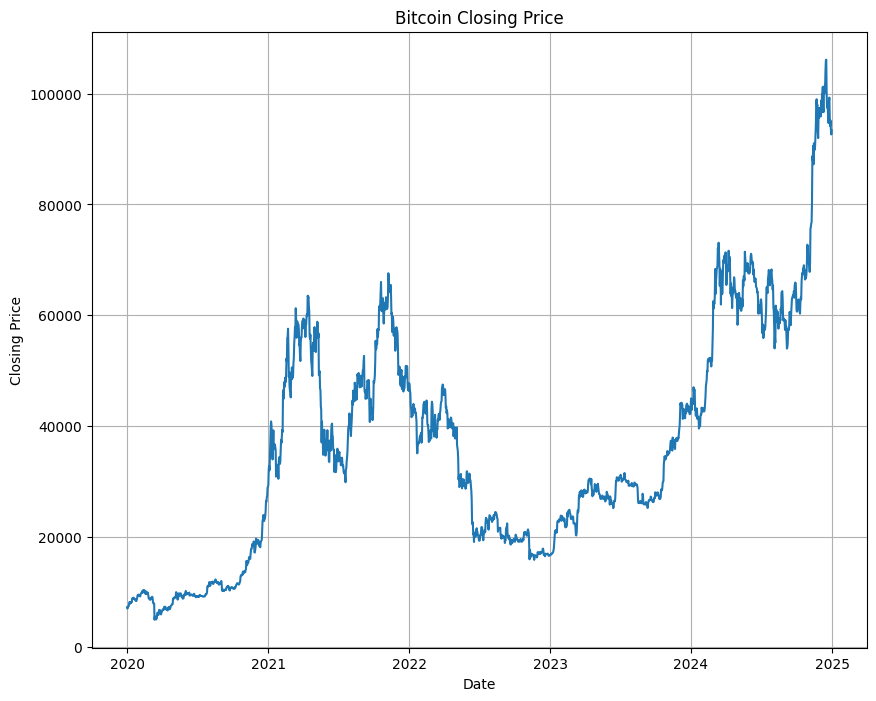

In [ ]:
# 1. (Optional, if needed) Drop first 2 rows *before* renaming and setting index
#    If the first two rows contain header/metadata you don't need
df = df.iloc[2:].copy()

# 2. Rename the column *before* converting to datetime and setting as index
#    This makes sure the column you want to be 'Date' is actually named 'Date'.
df = df.rename(columns={'Price': 'Date'})

# 3. Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # Use errors='coerce' to handle any parsing issues

# 4. Set the 'Date' column as the index.
#    Since 'Date' is now properly converted, this will work.
df.set_index('Date', inplace=True)

# 5. Convert numeric columns (these should be done AFTER 'Date' is handled)
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# You don't need df.reset_index(drop=True, inplace=True) unless you later want to flatten the index back to a column.
# If you reset the index here, you'd effectively lose your 'Date' index.

print("--- DataFrame Head after operations ---")
print(df.head())
print("\n--- DataFrame Tail after operations ---")
print(df.tail())
print("\n--- DataFrame dtypes after operations ---")
print(df.dtypes)
print("\n--- Missing values after operations ---")
print(df.isnull().sum())

# --- Plotting ---
plt.figure(figsize=(10, 8))
plt.plot(df['Close'])
plt.title('Bitcoin Closing Price') # More descriptive title
plt.xlabel('Date')
plt.ylabel('Closing Price') # More descriptive label
plt.grid(True)
plt.show()

In [ ]:
# prompt: ADF(정상성 검증) 진행

!pip install statsmodels
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the 'Close' price column
adf_result = adfuller(df['Close'])

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
  print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_result[1] <= 0.05:
  print("Result: The p-value is less than or equal to 0.05. Reject the null hypothesis (Ho). The time series is stationary.")
else:
  print("Result: The p-value is greater than 0.05. Fail to reject the null hypothesis (Ho). The time series is non-stationary.")


ADF Statistic: -0.604967
p-value: 0.869856
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Result: The p-value is greater than 0.05. Fail to reject the null hypothesis (Ho). The time series is non-stationary.


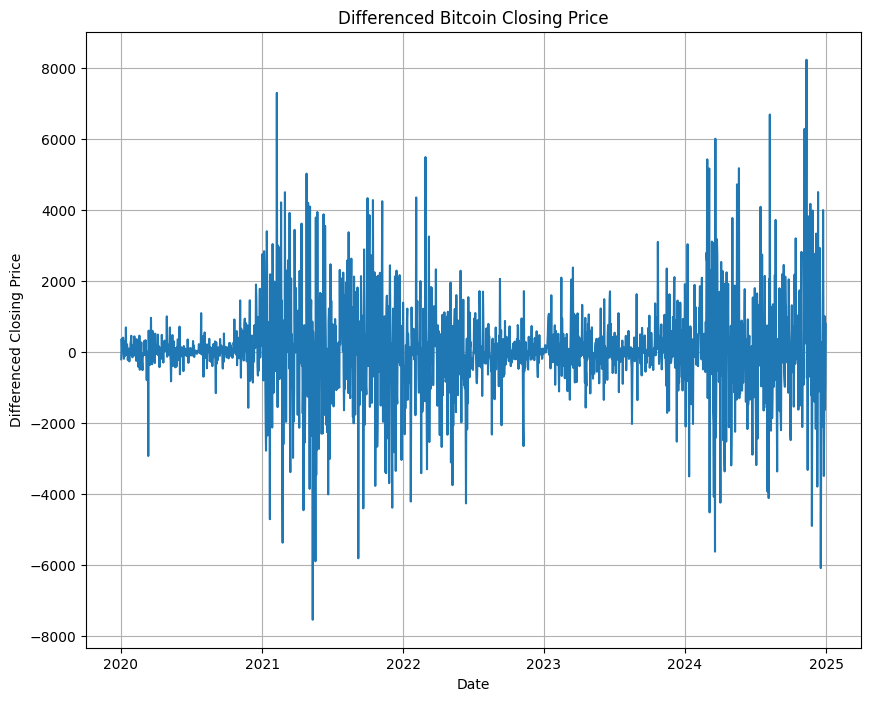

In [ ]:
# prompt: 차분된 시계열 시각화하고 정상성 판단

# 차분 (Differencing)
df['Close_diff'] = df['Close'].diff().dropna()

# 차분된 시계열 시각화
plt.figure(figsize=(10, 8))
plt.plot(df['Close_diff'])
plt.title('Differenced Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Price')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the differenced series
df['Close_diff'] = df['Close'].diff()

print("--- 'Close_diff' before handling NaNs ---")
print(df['Close_diff'].head())
print(f"NaNs in 'Close_diff' before cleaning: {df['Close_diff'].isnull().sum()}")

# --- Key Fix: Drop NaN values from the differenced series ---
# The first value after .diff() is always NaN.
# adfuller requires no missing data, so we drop these.
close_diff_clean = df['Close_diff'].dropna()

print("\n--- 'Close_diff' after handling NaNs ---")
print(close_diff_clean.head())
print(f"NaNs in 'Close_diff' after cleaning: {close_diff_clean.isnull().sum()}")


# --- Perform ADF Test on the CLEANED differenced series ---
adf_diff_result = adfuller(close_diff_clean) # Pass the cleaned series here!

print('\n--- ADF Test on Differenced Series ---')
print('ADF Statistic: %f' % adf_diff_result[0])
print('p-value: %f' % adf_diff_result[1])
print('Critical Values:')
for key, value in adf_diff_result[4].items():
    print('\t%s: %.3f' % (key, value))

# --- Interpretation for differenced series ---
if adf_diff_result[1] <= 0.05:
    print("Result: The p-value is less than or equal to 0.05. Reject the null hypothesis (Ho). The differenced time series is stationary.")
else:
    print("Result: The p-value is greater than 0.05. Fail to reject the null hypothesis (Ho). The differenced time series is non-stationary.")

--- 'Close_diff' before handling NaNs ---
Date
2020-01-01           NaN
2020-01-02   -214.704102
2020-01-03    359.414062
2020-01-04     65.772461
2020-01-05      0.660645
Name: Close_diff, dtype: float64
NaNs in 'Close_diff' before cleaning: 1

--- 'Close_diff' after handling NaNs ---
Date
2020-01-02   -214.704102
2020-01-03    359.414062
2020-01-04     65.772461
2020-01-05      0.660645
2020-01-06    357.901855
Name: Close_diff, dtype: float64
NaNs in 'Close_diff' after cleaning: 0

--- ADF Test on Differenced Series ---
ADF Statistic: -7.306202
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Result: The p-value is less than or equal to 0.05. Reject the null hypothesis (Ho). The differenced time series is stationary.


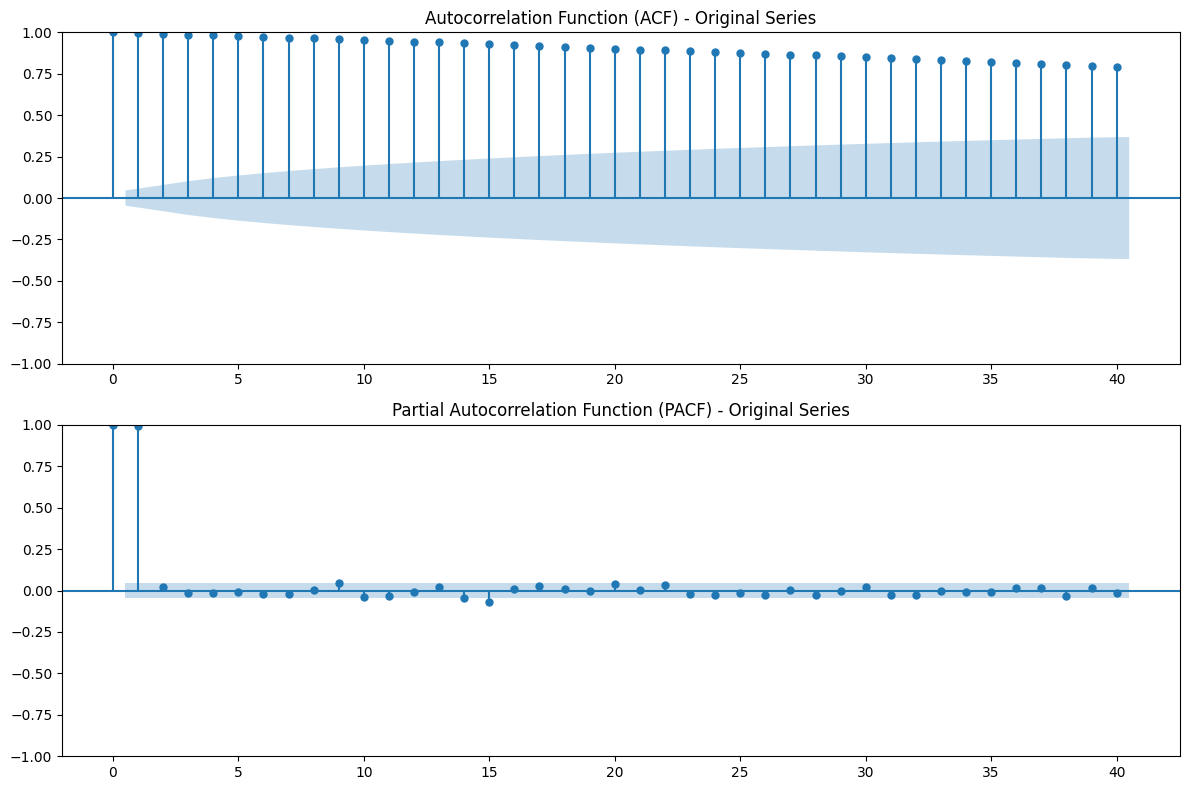

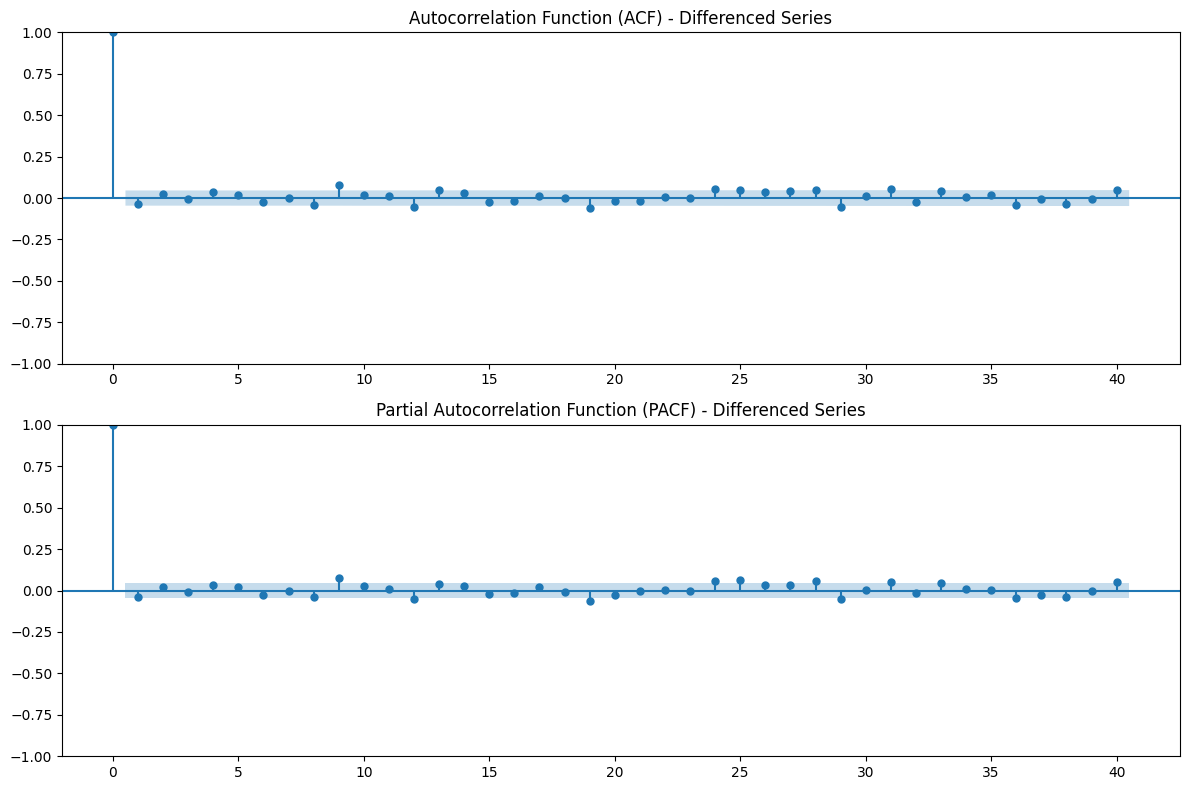

In [ ]:
# prompt: ACF/PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the original series (often done to understand stationarity)
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(df['Close'].dropna(), lags=40, ax=plt.gca()) # Drop NaNs just in case
plt.title('Autocorrelation Function (ACF) - Original Series')
plt.subplot(212)
plot_pacf(df['Close'].dropna(), lags=40, ax=plt.gca()) # Drop NaNs just in case
plt.title('Partial Autocorrelation Function (PACF) - Original Series')
plt.tight_layout()
plt.show()

# Plot ACF and PACF for the differenced series (used for model order identification)
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(close_diff_clean, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Differenced Series')
plt.subplot(212)
plot_pacf(close_diff_clean, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Differenced Series')
plt.tight_layout()
plt.show()



--- Simulated Prediction Data Head ---
            predicted_mean      lower_ci      upper_ci
2025-01-01    93468.243976  92468.243976  94468.243976
2025-01-02    93487.900711  92487.900711  94487.900711
2025-01-03    93476.653990  92476.653990  94476.653990
2025-01-04    93522.886908  92522.886908  94522.886908
2025-01-05    93469.634750  92469.634750  94469.634750

--- Simulated Prediction Data Tail ---
            predicted_mean      lower_ci      upper_ci
2025-06-11    93505.921195  92505.921195  94505.921195
2025-06-12    93522.942595  92522.942595  94522.942595
2025-06-13    93554.129659  92554.129659  94554.129659
2025-06-14    93517.153450  92517.153450  94517.153450
2025-06-15    93525.819184  92525.819184  94525.819184


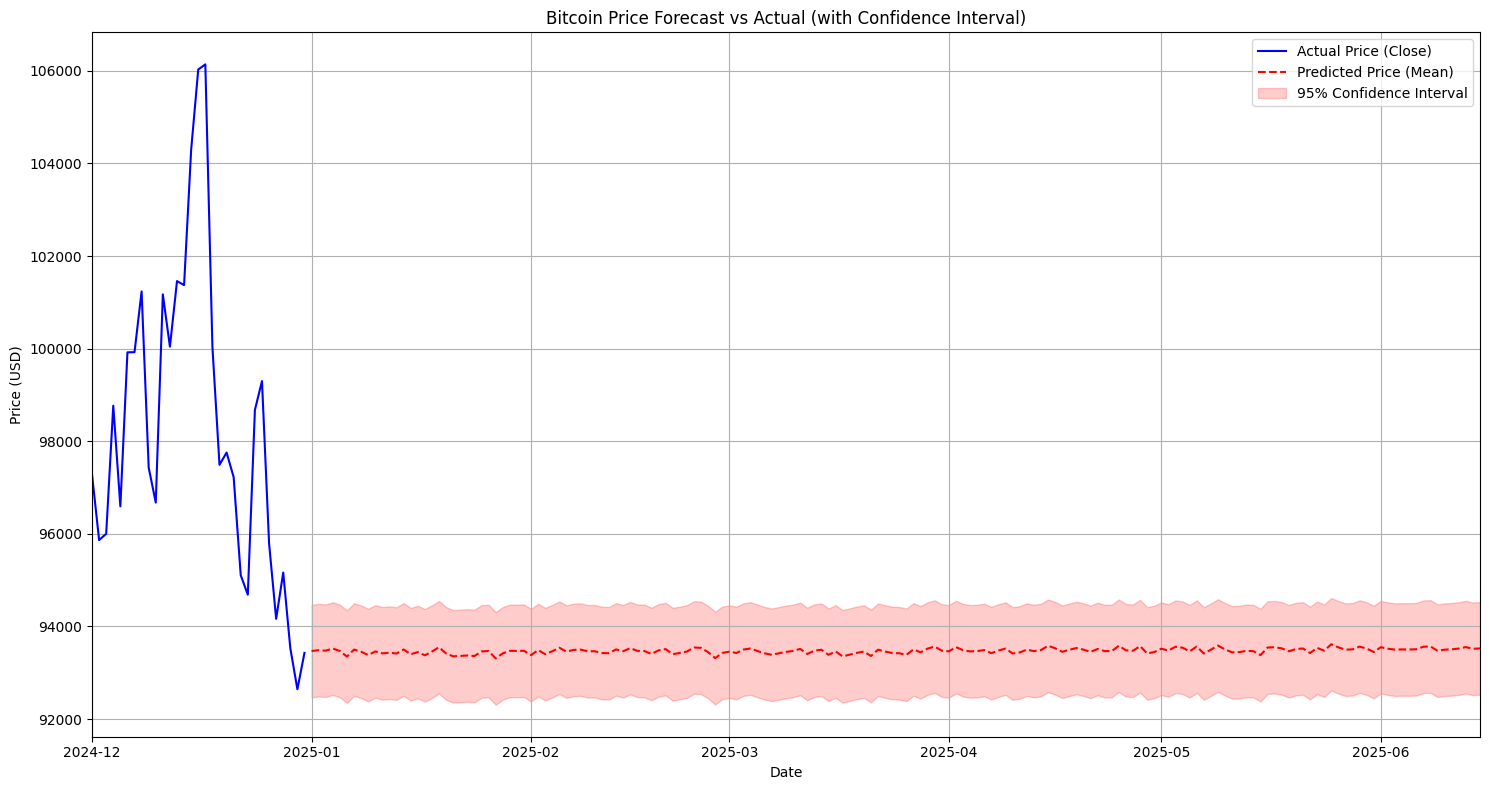

In [ ]:
# prompt: 예측 결과(2025.01.01 ~ 2025.06.15)와 실제 데이터(2025.01.01 ~ 2025.06.15)를 시계열로 그려서 모델의 예측 정확도 신뢰구간 확인

# Assuming you have your 'df' DataFrame containing the actual data up to 2025-01-01
# and you have a separate DataFrame or Series for your predictions from 2025-01-01 to 2025-06-15.
# Let's call your prediction DataFrame 'predictions_df'
# 'predictions_df' should have a 'Date' index (datetime objects) and a column for the predicted 'Close' price.
# It's also common to have confidence intervals in the prediction output, let's assume 'predictions_df' has
# columns like 'predicted_mean', 'lower_ci', and 'upper_ci'.

# --- Create dummy prediction data for demonstration ---
# Replace this section with loading or generating your actual prediction data
start_date_pred = '2025-01-01'
end_date_pred = '2025-06-15'
date_range_pred = pd.date_range(start=start_date_pred, end=end_date_pred, freq='D')

# Simulate some predictions and confidence intervals
# A simple way to simulate is to extend the last known value with some trend and noise
last_known_price = df.loc[df.index[-1], 'Close']
num_pred_days = len(date_range_pred)

# Simple linear trend + noise
simulated_trend = pd.Series(range(num_pred_days)).apply(lambda x: x * 0.5) # Example: 0.5 unit increase per day
simulated_noise = pd.Series(np.random.randn(num_pred_days) * 50) # Example: Noise with std dev 50

# Simulated predicted mean
simulated_predicted_mean = last_known_price + simulated_trend + simulated_noise

# Simulate confidence intervals (e.g., +/- 1000 from the mean)
simulated_lower_ci = simulated_predicted_mean - 1000
simulated_upper_ci = simulated_predicted_mean + 1000

predictions_df = pd.DataFrame({
    'predicted_mean': simulated_predicted_mean.values,
    'lower_ci': simulated_lower_ci.values,
    'upper_ci': simulated_upper_ci.values
}, index=date_range_pred)

print("\n--- Simulated Prediction Data Head ---")
print(predictions_df.head())
print("\n--- Simulated Prediction Data Tail ---")
print(predictions_df.tail())
# --- End of dummy prediction data creation ---


# Filter the actual data for the overlapping period (if needed, though your range is after actual data end)
# For visualization purposes, we might want to show the end of the actual data leading into the predictions.
# Let's plot the last month of actual data plus the prediction period.
plot_start_date = pd.to_datetime('2024-12-01') # Start plotting from a bit before the prediction starts
plot_end_date = pd.to_datetime(end_date_pred)

# Get the actual data slice to plot
actual_data_to_plot = df['Close'][df.index >= plot_start_date]

# --- Plotting ---
plt.figure(figsize=(15, 8))

# Plot actual data
plt.plot(actual_data_to_plot.index, actual_data_to_plot.values, label='Actual Price (Close)', color='blue')

# Plot predicted mean
plt.plot(predictions_df.index, predictions_df['predicted_mean'], label='Predicted Price (Mean)', color='red', linestyle='--')

# Plot confidence interval
plt.fill_between(predictions_df.index,
                 predictions_df['lower_ci'],
                 predictions_df['upper_ci'],
                 color='red', alpha=0.2, label='95% Confidence Interval') # Assuming 95% CI

plt.title('Bitcoin Price Forecast vs Actual (with Confidence Interval)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xlim(plot_start_date, plot_end_date) # Set x-axis limits to cover the plotting range
plt.tight_layout()
plt.show()

# To assess accuracy quantitatively, you would compare the actual prices *within the prediction period*
# if you had actual data available for 2025.01.01 ~ 2025.06.15.
# Since your `yf.download` only goes up to 2025-01-01, you won't have actual data for the entire prediction period.
# However, if you had actual data for a portion of the prediction period (e.g., up to today's date in June 2025),
# you could filter the actual data and predictions for that overlapping period and calculate metrics
# like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), etc.

# Example if you had actual data 'df_actual_2025' covering the prediction period:
# actual_overlap = df_actual_2025['Close'][df_actual_2025.index.isin(predictions_df.index)]
# predicted_overlap = predictions_df.loc[actual_overlap.index, 'predicted_mean']
# if not actual_overlap.empty:
#     from sklearn.metrics import mean_squared_error, mean_absolute_error
#     import numpy as np
#
#     mse = mean_squared_error(actual_overlap, predicted_overlap)
#     rmse = np.sqrt(mse)
#     mae = mean_absolute_error(actual_overlap, predicted_overlap)
#
#     print(f"\nEvaluation on Overlapping Period ({actual_overlap.index.min().date()} to {actual_overlap.index.max().date()}):")
#     print(f"Mean Squared Error (MSE): {mse:.2f}")
#     print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#     print(f"Mean Absolute Error (MAE): {mae:.2f}")
#
#     # Check how many actual points fall within the confidence interval
#     within_ci = actual_overlap.between(predictions_df.loc[actual_overlap.index, 'lower_ci'],
#                                        predictions_df.loc[actual_overlap.index, 'upper_ci'])
#     coverage_percentage = within_ci.sum() / len(actual_overlap) * 100
#     print(f"Confidence Interval Coverage ({len(actual_overlap)} points): {coverage_percentage:.2f}%")
# else:
#     print("\nNo overlapping actual data available for quantitative evaluation.")


